In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For the model and its training
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join("C:/Users/Akif/Desktop/gtsds", 'Train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

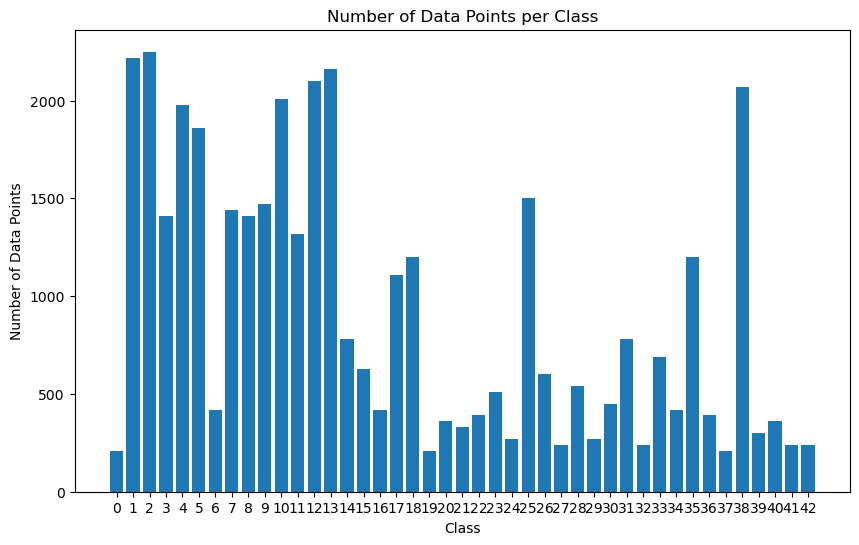

In [3]:
class_counts = np.bincount(labels)
class_numbers = np.arange(classes)


plt.figure(figsize=(10, 6))
plt.bar(class_numbers, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Class')
plt.xticks(class_numbers)
plt.show()

In [4]:
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)


In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    rescale=1.0/255.0
)

datagen.fit(X_train)

In [6]:
def create_model(learning_rate=0.001, dropout_rate=0.25, num_filters=(32, 64), dense_units=512):
    model = Sequential()

    model.add(Conv2D(num_filters[0], (3, 3), activation='relu', input_shape=(30, 30, 3)))
    model.add(Conv2D(num_filters[0], (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(num_filters[1], (3, 3), activation='relu'))
    model.add(Conv2D(num_filters[1], (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(43, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [7]:
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=1)

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [256, 512, 1024],
    'epochs': [25, 30, 35],
}

grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train) 

C:\Users\Akif\AppData\Local\Temp\ipykernel_17904\421771146.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=128, verbose=1)


Epoch 1/25
82/82 [==============================] - 26s 309ms/step - loss: 4.3557 - accuracy: 0.2974
Epoch 2/25
82/82 [==============================] - 30s 364ms/step - loss: 0.9336 - accuracy: 0.7415
Epoch 3/25
82/82 [==============================] - 28s 348ms/step - loss: 0.4549 - accuracy: 0.8762
Epoch 4/25
82/82 [==============================] - 27s 333ms/step - loss: 0.2903 - accuracy: 0.9223
Epoch 5/25
82/82 [==============================] - 25s 303ms/step - loss: 0.2079 - accuracy: 0.9428
Epoch 6/25
82/82 [==============================] - 25s 307ms/step - loss: 0.1803 - accuracy: 0.9509
Epoch 7/25
82/82 [==============================] - 26s 315ms/step - loss: 0.1368 - accuracy: 0.9625
Epoch 8/25
82/82 [==============================] - 26s 313ms/step - loss: 0.1073 - accuracy: 0.9704
Epoch 9/25
82/82 [==============================] - 25s 307ms/step - loss: 0.0974 - accuracy: 0.9727
Epoch 10/25
82/82 [==============================] - 25s 311ms/step - loss: 0.0934 - accura

In [8]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'batch_size': 512, 'epochs': 30, 'learning_rate': 0.001}
Best Accuracy:  0.9964931209882101


Epoch 1/30
61/61 [==============================] - 57s 921ms/step - loss: 2.0804 - accuracy: 0.4517 - val_loss: 0.4683 - val_accuracy: 0.9689
Epoch 2/30
61/61 [==============================] - 59s 974ms/step - loss: 0.8384 - accuracy: 0.7512 - val_loss: 0.9413 - val_accuracy: 0.9666
Epoch 3/30
61/61 [==============================] - 61s 1s/step - loss: 0.5611 - accuracy: 0.8312 - val_loss: 1.1600 - val_accuracy: 0.9721
Epoch 4/30
61/61 [==============================] - 61s 996ms/step - loss: 0.4292 - accuracy: 0.8703 - val_loss: 0.8716 - val_accuracy: 0.9790
Epoch 5/30
61/61 [==============================] - 61s 995ms/step - loss: 0.3498 - accuracy: 0.8938 - val_loss: 0.9552 - val_accuracy: 0.9788
Epoch 6/30
61/61 [==============================] - 60s 985ms/step - loss: 0.2903 - accuracy: 0.9132 - val_loss: 0.9645 - val_accuracy: 0.9821
Epoch 7/30
61/61 [==============================] - 61s 989ms/step - loss: 0.2522 - accuracy: 0.9218 - val_loss: 1.0900 - val_accuracy: 0.9805
Ep

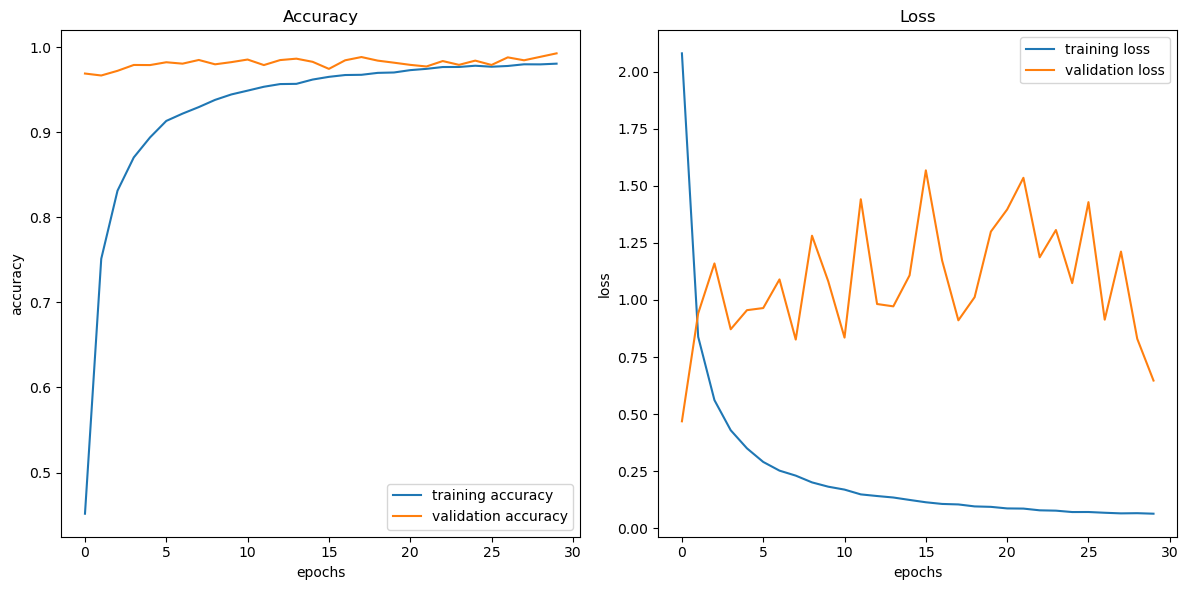

In [10]:
best_model = grid_result.best_estimator_.model

history = best_model.fit(datagen.flow(X_train, y_train, batch_size=grid_result.best_params_['batch_size']),
                         steps_per_epoch=len(X_train) // grid_result.best_params_['batch_size'],
                         epochs=grid_result.best_params_['epochs'],
                         validation_data=(X_test, y_test))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

395/395 [==============================] - 5s 11ms/step
Test Accuracy: 0.9625494853523358
Test F1 Score: 0.9627494979488034
Test Precision: 0.9671861946577757
Test Recall: 0.9625494853523358
Confusion Matrix:
[[ 60   0   0 ...   0   0   0]
 [  0 719   0 ...   0   0   0]
 [  0   1 746 ...   2   0   0]
 ...
 [  0   0   0 ...  89   0   0]
 [  0   0   0 ...   0  60   0]
 [  0   0   0 ...   0   0  90]]


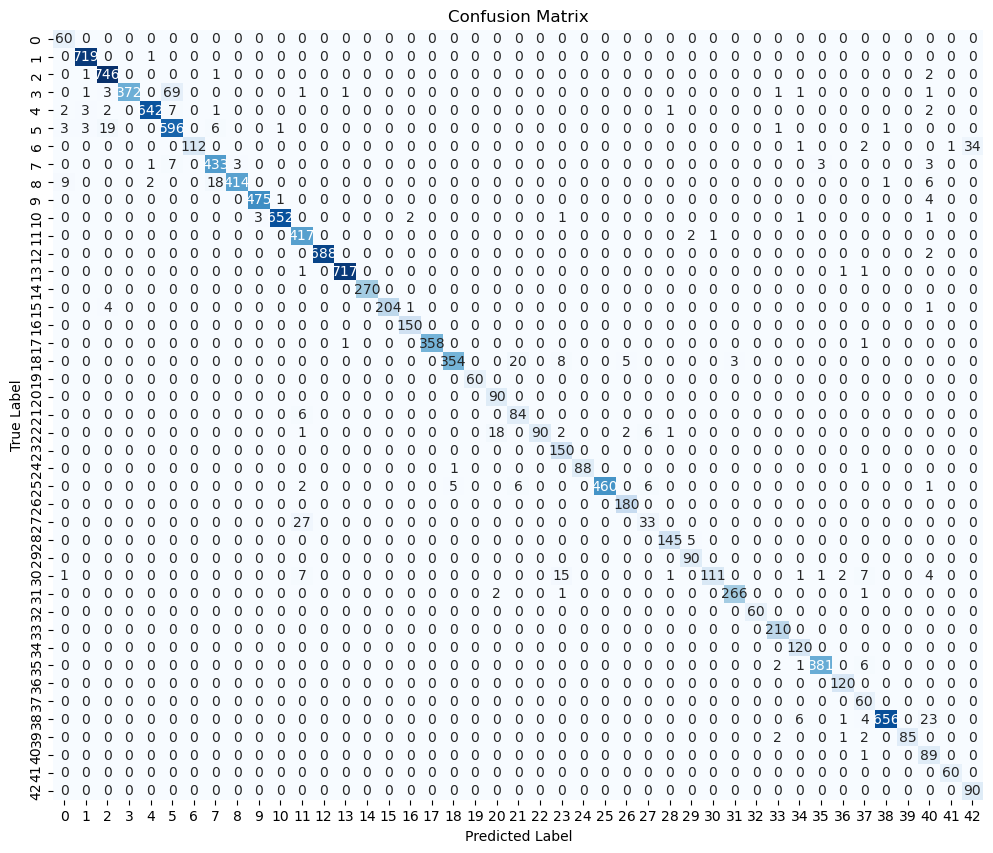

In [12]:
y_test = pd.read_csv('C:/Users/Akif/Desktop/gtsds/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    try:
        image = Image.open('C:/Users/Akif/Desktop/gtsds/' + img)
        image = image.resize((30, 30))
        data.append(np.array(image))
    except:
        print("Error loading image")

X_test = np.array(data)

y_pred = np.argmax(best_model.predict(X_test), axis=-1)

test_accuracy = accuracy_score(labels, y_pred)
test_f1 = f1_score(labels, y_pred, average='weighted')
test_precision = precision_score(labels, y_pred, average='weighted')
test_recall = recall_score(labels, y_pred, average='weighted')
confusion_mat = confusion_matrix(labels, y_pred)

print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
# Evaluating the model on the test dataset
test_df = pd.read_csv('C:/Users/Akif/Desktop/gtsds/Test.csv')

test_labels = test_df["ClassId"].values
test_paths = test_df["Path"].values

test_data = []

for path in test_paths:
    if path.endswith('.png'):
        image = Image.open('C:/Users/Akif/Desktop/gtsds/' + path)
        image = image.resize((30, 30))
        test_data.append(np.array(image))

X_test = np.array(test_data)

X_test = X_test / 255.0

predictions = np.argmax(best_model.predict(X_test), axis=-1)

accuracy = np.mean(predictions == test_labels)

print("Accuracy on test dataset:", accuracy)

395/395 [==============================] - 5s 12ms/step
Accuracy on test dataset: 0.981631037212985
